In [1]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
path = '../../parsers/official/data/club_stat.csv'
df = pd.read_csv(Path(path).resolve())
pd.set_option('display.max_columns', None)
df.head()

,season_id,name,club_name,club_shortName,club_abbr,club_id,teamType,shortName,id,_accurate_back_zone_pass,_accurate_chipped_pass,_accurate_corners_intobox,_accurate_cross,_accurate_cross_nocorner,_accurate_flick_on,_accurate_freekick_cross,_accurate_fwd_zone_pass,_accurate_goal_kicks,_accurate_keeper_sweeper,_accurate_keeper_throws,_accurate_launches,_accurate_layoffs,_accurate_long_balls,_accurate_pass,_accurate_pull_back,_accurate_through_ball,_accurate_throws,_aerial_lost,_aerial_won,_attempted_tackle_foul,_attempts_conceded_ibox,_attempts_conceded_obox,_attempts_ibox,_attempts_obox,_att_assist_openplay,_att_assist_setplay,_att_bx_centre,_att_bx_left,_att_bx_right,_att_cmiss_high,_att_cmiss_left,_att_cmiss_right,_att_corner,_att_fastbreak,_att_goal_high_centre,_att_goal_high_left,_att_goal_high_right,_att_goal_low_centre,_att_goal_low_left,_att_goal_low_right,_att_hd_goal,_att_hd_miss,_att_hd_post,_att_hd_target,_att_hd_total,_att_ibox_blocked,_att_ibox_goal,_att_ibox_miss,_att_ibox_post,_att_ibox_target,_att_lf_goal,_att_lf_target,_att_lf_total,_att_miss_high,_att_miss_high_left,_att_miss_high_right,_att_miss_left,_att_miss_right,_att_obox_blocked,_att_obox_goal,_att_obox_miss,_att_obox_target,_att_obx_centre,_att_one_on_one,_att_openplay,_att_pen_goal,_att_post_left,_att_rf_goal,_att_rf_target,_att_rf_total,_att_setpiece,_att_sv_high_centre,_att_sv_high_left,_att_sv_high_right,_att_sv_low_centre,_att_sv_low_left,_att_sv_low_right,_backward_pass,_ball_recovery,_big_chance_created,_big_chance_missed,_big_chance_scored,_blocked_cross,_blocked_pass,_blocked_scoring_att,_challenge_lost,_clean_sheet,_clearance_off_line,_contentious_decision,_corner_taken,_crosses_18yard,_crosses_18yardplus,_defender_goals,_dispossessed,_diving_save,_draws,_duel_lost,_duel_won,_effective_blocked_cross,_effective_clearance,_effective_head_clearance,_error_lead_to_goal,_error_lead_to_shot,_final_third_entries,_first_half_goals,_fk_foul_lost,_fk_foul_won,_forward_goals,_fouled_final_third,_freekick_cross,_fwd_pass,_goals,_goals_conceded,_goals_conceded_ibox,_goals_conceded_obox,_goals_openplay,_goal_assist,_goal_assist_deadball,_goal_assist_intentional,_goal_assist_openplay,_goal_assist_setplay,_goal_fastbreak,_goal_kicks,_good_high_claim,_hand_ball,_head_clearance,_hit_woodwork,_interception,_interceptions_in_box,_interception_won,_keeper_throws,_last_man_tackle,_leftside_pass,_long_pass_own_to_opp,_long_pass_own_to_opp_success,_lost_corners,_midfielder_goals,_offtarget_att_assist,_ontarget_att_assist,_ontarget_scoring_att,_open_play_pass,_outfielder_block,_overrun,_own_goal_accrued,_passes_left,_passes_right,_penalty_conceded,_penalty_faced,_penalty_won,_pen_area_entries,_pen_goals_conceded,_possession_percentage,_poss_lost_all,_poss_lost_ctrl,_poss_won_att_3rd,_poss_won_def_3rd,_poss_won_mid_3rd,_post_scoring_att,_pts_dropped_winning_pos,_pts_gained_losing_pos,_punches,_put_through,_rightside_pass,_saved_ibox,_saved_obox,_saves,_second_yellow,_shield_ball_oop,_shot_fastbreak,_shot_off_target,_six_yard_block,_subs_goals,_subs_made,_successful_final_third_passes,_successful_open_play_pass,_successful_put_through,_total_att_assist,_total_back_zone_pass,_total_chipped_pass,_total_clearance,_total_contest,_total_corners_intobox,_total_cross,_total_cross_nocorner,_total_fastbreak,_total_final_third_passes,_total_flick_on,_total_fwd_zone_pass,_total_high_claim,_total_keeper_sweeper,_total_launches,_total_layoffs,_total_long_balls,_total_offside,_total_pass,_total_pull_back,_total_red_card,_total_scoring_att,_total_tackle,_total_through_ball,_total_throws,_total_yel_card,_touches,_touches_in_opp_box,_unsuccessful_touch,_wins,_won_contest,_won_corners,_won_tackle,_attendance_count,_attendance_total,_attendance_average,_attendance_highest,_attendance_lowest
0,578,Arsenal,Arsenal,Arsenal,ARS,1.0,FIRST,Arsenal,1.0,4351.0,339.0,37.0,100.0,64.0,13.0,7.0,5627.0,78.0,9.0,107.0,55.0,104.0,397.0,9878.0,7.0,21.0,252.0,260.0,249.0,118.0,111.0,61.0,228.0,97.0,199.0,

In [44]:
df['club_id'].unique()

array([  1.,   2., 127., 130., 131.,  43.,  46.,   4.,   6.,   7.,  34.,
       159.,  41.,   9.,  26.,  10., 163.,  11.,  12.,  13.,  23.,  14.,
        15.,  17.,  18.,  20.,  42.,  29.,  45.,  21.,  33.,  36.,  25.,
        38.])

In [45]:
df['teamType'].unique()

array(['FIRST'], dtype=object)

In [46]:
#Удаляем колонки в которых информация дублируется либо информация бесполезна
df.drop(['name',
         'club_shortName',
         'shortName', 
         'id', 
         'teamType'], axis=1, inplace=True)

In [47]:
df.describe()

,season_id,club_id,_accurate_back_zone_pass,_accurate_chipped_pass,_accurate_corners_intobox,_accurate_cross,_accurate_cross_nocorner,_accurate_flick_on,_accurate_freekick_cross,_accurate_fwd_zone_pass,_accurate_goal_kicks,_accurate_keeper_sweeper,_accurate_keeper_throws,_accurate_launches,_accurate_layoffs,_accurate_long_balls,_accurate_pass,_accurate_pull_back,_accurate_through_ball,_accurate_throws,_aerial_lost,_aerial_won,_attempted_tackle_foul,_attempts_conceded_ibox,_attempts_conceded_obox,_attempts_ibox,_attempts_obox,_att_assist_openplay,_att_assist_setplay,_att_bx_centre,_att_bx_left,_att_bx_right,_att_cmiss_high,_att_cmiss_left,_att_cmiss_right,_att_corner,_att_fastbreak,_att_goal_high_centre,_att_goal_high_left,_att_goal_high_right,_att_goal_low_centre,_att_goal_low_left,_att_goal_low_right,_att_hd_goal,_att_hd_miss,_att_hd_post,_att_hd_target,_att_hd_total,_att_ibox_blocked,_att_ibox_goal,_att_ibox_miss,_att_ibox_post,_att_ibox_target,_att_lf_goal,_att_lf_target,_att_lf_total,_att_miss_high,_att_miss_high_left,_att_miss_high_right,_att_miss_left,_att_miss_right,_att_obox_blocked,_att_obox_goal,_att_obox_miss,_att_obox_target,_att_obx_centre,_att_one_on_one,_att_openplay,_att_pen_goal,_att_post_left,_att_rf_goal,_att_rf_target,_att_rf_total,_att_setpiece,_att_sv_high_centre,_att_sv_high_left,_att_sv_high_right,_att_sv_low_centre,_att_sv_low_left,_att_sv_low_right,_backward_pass,_ball_recovery,_big_chance_created,_big_chance_missed,_big_chance_scored,_blocked_cross,_blocked_pass,_blocked_scoring_att,_challenge_lost,_clean_sheet,_clearance_off_line,_contentious_decision,_corner_taken,_crosses_18yard,_crosses_18yardplus,_defender_goals,_dispossessed,_diving_save,_draws,_duel_lost,_duel_won,_effective_blocked_cross,_effective_clearance,_effective_head_clearance,_error_lead_to_goal,_error_lead_to_shot,_final_third_entries,_first_half_goals,_fk_foul_lost,_fk_foul_won,_forward_goals,_fouled_final_third,_freekick_cross,_fwd_pass,_goals,_goals_conceded,_goals_conceded_ibox,_goals_conceded_obox,_goals_openplay,_goal_assist,_goal_assist_deadball,_goal_assist_intentional,_goal_assist_openplay,_goal_assist_setplay,_goal_fastbreak,_goal_kicks,_good_high_claim,_hand_ball,_head_clearance,_hit_woodwork,_interception,_interceptions_in_box,_interception_won,_keeper_throws,_last_man_tackle,_leftside_pass,_long_pass_own_to_opp,_long_pass_own_to_opp_success,_lost_corners,_midfielder_goals,_offtarget_att_assist,_ontarget_att_assist,_ontarget_scoring_att,_open_play_pass,_outfielder_block,_overrun,_own_goal_accrued,_passes_left,_passes_right,_penalty_conceded,_penalty_faced,_penalty_won,_pen_area_entries,_pen_goals_conceded,_possession_percentage,_poss_lost_all,_poss_lost_ctrl,_poss_won_att_3rd,_poss_won_def_3rd,_poss_won_mid_3rd,_post_scoring_att,_pts_dropped_winning_pos,_pts_gained_losing_pos,_punches,_put_through,_rightside_pass,_saved_ibox,_saved_obox,_saves,_second_yellow,_shield_ball_oop,_shot_fastbreak,_shot_off_target,_six_yard_block,_subs_goals,_subs_made,_successful_final_third_passes,_successful_open_play_pass,_successful_put_through,_total_att_assist,_total_back_zone_pass,_total_chipped_pass,_total_clearance,_total_contest,_total_corners_intobox,_total_cross,_total_cross_nocorner,_total_fastbreak,_total_final_third_passes,_total_flick_on,_total_fwd_zone_pass,_total_high_claim,_total_keeper_sweeper,_total_launches,_total_layoffs,_total_long_balls,_total_offside,_total_pass,_total_pull_back,_total_red_card,_total_scoring_att,_total_tackle,_total_through_ball,_total_throws,_total_yel_card,_touches,_touches_in_opp_box,_unsuccessful_touch,_wins,_won_contest,_won_corners,_won_tackle,_attendance_count,_attendance_total,_attendance_average,_attendance_highest,_attendance_lowest
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,199.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00

In [48]:
df.shape

(200, 219)

In [49]:
id_season = {
        578: 2023,
        489: 2022,
        418: 2021,
        363: 2020,
        274: 2019,
        210: 2018,
        79: 2017,
        54: 2016,
        42: 2015,
        27: 2014,
        22: 2013,
        21: 2012,
        20: 2011,
        19: 2010,
        18: 2009,
        17: 2008,
        16: 2007,
        15: 2006,
        14: 2005,
        13: 2004,
        12: 2003,
        11: 2002,
        10: 2001,
        9: 2000,
        8: 1999,
        7: 1998,
        6: 1997,
        5: 1996,
        4: 1995,
        3: 1994,
        2: 1993,
        1: 1992}

In [50]:
df['season'] = df['season_id'].apply(lambda x: id_season[x])

In [51]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 220 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    season_id                       200 non-null    int64  
 1    club_name                       200 non-null    object 
 2    club_abbr                       200 non-null    object 
 3    club_id                         200 non-null    float64
 4    _accurate_back_zone_pass        200 non-null    float64
 5    _accurate_chipped_pass          200 non-null    float64
 6    _accurate_corners_intobox       200 non-null    float64
 7    _accurate_cross                 200 non-null    float64
 8    _accurate_cross_nocorner        200 non-null    float64
 9    _accurate_flick_on              200 non-null    float64
 10   _accurate_freekick_cross        200 non-null    float64
 11   _accurate_fwd_zone_pass         200 non-null    float64
 12   _accurate_goal_kicks

In [52]:
df['club_name'].unique()

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford',
       'Brighton and Hove Albion', 'Burnley', 'Cardiff City', 'Chelsea',
       'Crystal Palace', 'Everton', 'Fulham', 'Huddersfield Town',
       'Hull City', 'Leeds United', 'Leicester City', 'Liverpool',
       'Luton Town', 'Manchester City', 'Manchester United',
       'Middlesbrough', 'Newcastle United', 'Norwich City',
       'Nottingham Forest', 'Queens Park Rangers', 'Sheffield United',
       'Southampton', 'Stoke City', 'Sunderland', 'Swansea City',
       'Tottenham Hotspur', 'Watford', 'West Bromwich Albion',
       'West Ham United', 'Wolverhampton Wanderers'], dtype=object)

In [53]:
columns = list(df.columns)

In [54]:
columns

['season_id',
 'club_name',
 'club_abbr',
 'club_id',
 '_accurate_back_zone_pass',
 '_accurate_chipped_pass',
 '_accurate_corners_intobox',
 '_accurate_cross',
 '_accurate_cross_nocorner',
 '_accurate_flick_on',
 '_accurate_freekick_cross',
 '_accurate_fwd_zone_pass',
 '_accurate_goal_kicks',
 '_accurate_keeper_sweeper',
 '_accurate_keeper_throws',
 '_accurate_launches',
 '_accurate_layoffs',
 '_accurate_long_balls',
 '_accurate_pass',
 '_accurate_pull_back',
 '_accurate_through_ball',
 '_accurate_throws',
 '_aerial_lost',
 '_aerial_won',
 '_attempted_tackle_foul',
 '_attempts_conceded_ibox',
 '_attempts_conceded_obox',
 '_attempts_ibox',
 '_attempts_obox',
 '_att_assist_openplay',
 '_att_assist_setplay',
 '_att_bx_centre',
 '_att_bx_left',
 '_att_bx_right',
 '_att_cmiss_high',
 '_att_cmiss_left',
 '_att_cmiss_right',
 '_att_corner',
 '_att_fastbreak',
 '_att_goal_high_centre',
 '_att_goal_high_left',
 '_att_goal_high_right',
 '_att_goal_low_centre',
 '_att_goal_low_left',
 '_att_goal_

In [55]:
col_eda = [
        'season',
        'club_name',
        '_accurate_pass',
        '_accurate_goal_kicks',
        '_accurate_cross',
        '_aerial_lost',
        '_aerial_won',
        '_total_long_balls',
        '_total_offside',
        '_total_pass',
        '_total_cross',
        '_duel_lost',
        '_duel_won',
        '_saves',
        '_wins',
        '_draws',
        '_won_contest',
        '_won_corners',
        '_won_tackle',
        '_total_yel_card',
        '_keeper_throws',
        '_fwd_pass',
        '_goals',
        '_goals_conceded',
        '_goals_conceded_ibox',
        '_goals_openplay',
        '_goal_assist',
        '_goal_assist_intentional',
        '_goal_assist_openplay',
        '_goal_kicks',
        '_good_high_claim',
        '_blocked_cross',
        '_blocked_pass',
]

In [56]:
df_new = df[col_eda]

<Axes: >

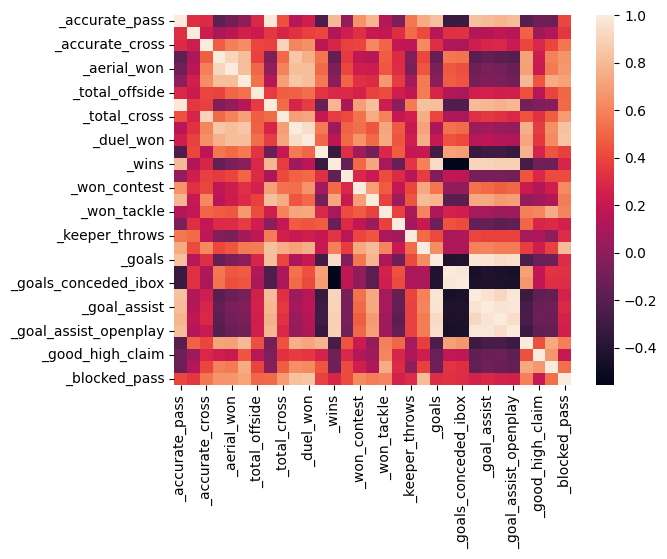

In [57]:
sns.heatmap(df_new.iloc[:, 2:].corr())

Больше всего нам интересны победы и голы, пусть они будут нашими целевыми признаками. Рассмотрим корреляцию других признаков к целевым

In [58]:
df_new.iloc[:, 2:].corr()[['_wins', '_goals']]

,_wins,_goals
_accurate_pass,0.796481,0.818951
_accurate_goal_kicks,0.120592,0.143002
_accurate_cross,0.282456,0.314923
_aerial_lost,-0.163341,-0.146621
_aerial_won,-0.067875,-0.064190
_total_long_balls,-0.020450,-0.014658
_total_offside,0.286665,0.280623
_total_pass,0.784153,0.811825
_total_cross,0.364512,0.392066
_duel_lost,0.062510,0.106796


Теперь возьмем полный датасет и посмотрим какие признаки наиболее зависимы и наименее, фильтровать будем по голам

In [59]:
#Значения нам нужны по модулю
df.iloc[:, 4:].corr()[['_wins', '_goals']].sort_values(by='_goals', key= lambda x: abs(x))[:20]

,_wins,_goals
_last_man_tackle,0.014187,0.007366
_total_long_balls,-0.020450,-0.014658
_punches,-0.067197,-0.021231
_interception_won,0.009771,0.021313
_interception,0.009799,0.021354
_error_lead_to_goal,-0.127142,-0.022472
_att_setpiece,-0.077744,-0.043871
_draws,-0.151377,-0.054432
_accurate_freekick_cross,-0.089359,-0.057837
_freekick_cross,-0.090851,-0.059593


In [60]:
df.iloc[:, 4:].corr()[['_wins', '_goals']].sort_values(by='_goals', ascending=False, key= lambda x: abs(x))[:20]


,_wins,_goals
_goals,0.928475,1.000000
_att_ibox_goal,0.925415,0.987252
_goals_openplay,0.908592,0.971318
_goal_assist,0.901515,0.966598
_goal_assist_openplay,0.885620,0.948575
_big_chance_scored,0.866701,0.936519
_goal_assist_intentional,0.880440,0.930261
_first_half_goals,0.871803,0.929339
_wins,1.000000,0.928475
_ontarget_scoring_att,0.858581,0.916249


Сгруппируем датасет по командам, берем среднее значение т.к. не все команды играли все сезоны

In [61]:
df_group = df_new.iloc[:, 1:].groupby(by='club_name', as_index=False).mean()

In [62]:
df_group.head()

,club_name,_accurate_pass,_accurate_goal_kicks,_accurate_cross,_aerial_lost,_aerial_won,_total_long_balls,_total_offside,_total_pass,_total_cross,_duel_lost,_duel_won,_saves,_wins,_draws,_won_contest,_won_corners,_won_tackle,_total_yel_card,_keeper_throws,_fwd_pass,_goals,_goals_conceded,_goals_conceded_ibox,_goals_openplay,_goal_assist,_goal_assist_intentional,_goal_assist_openplay,_goal_kicks,_good_high_claim,_blocked_cross,_blocked_pass
0,Arsenal,16547.100000,146.700000,145.300000,565.600000,541.800000,1789.000000,71.900000,19634.700000,664.800000,1843.800000,1881.500000,103.800000,19.700000,7.300000,376.100000,217.400000,376.300000,58.000000,190.100000,6329.700000,65.700000,41.600000,37.000000,46.500000,47.000000,37.200000,38.400000,243.800000,31.200000,61.100000,568.600000
1,Aston Villa,11558.857143,166.000000,152.857143,572.285714,583.571429,2096.285714,53.428571,14536.142857,680.000000,1834.857143,1912.714286,107.428571,11.714286,7.000000,321.428571,178.000000,358.000000,70.571429,155.714286,5200.142857,42.857143,53.285714,45.571429,28.142857,31.142857,23.857143,24.428571,272.285714,45.285714,81.428571,489.000000
2,Bournemouth,11487.857143,162.142857,138.000000,634.428571,595.857143,2045.714286,51.571429,14671.428571,598.857143,1940.142857,1844.428571,109.714286,10.571429,7.428571,331.714286,182.571429,352.285714,56.857143,182.428571,5509.285714,43.857143,62.428571,55.142857,27.571429,30.285714,23.571429,22.571429,295.142857,29.857143,85.714286,566.714286
3,Brentford,9271.333333,156.666667,141.000000,564.333333,568.000000,1919.000000,57.000000,12310.666667,549.000000,1594.333333,1622.333333,111.666667,11.000000,8.333333,220.333333,138.333333,298.000000,52.666667,138.666667,4890.666667,44.000000,44.333333,36.000000,25.333333,28.333333,23.000000,21.000000,241.000000,33.333333,49.333333,363.333333
4,Brighton and Hove Albion,13710.714286,171.571429,154.571429,550.857143,592.142857,2080.571429,68.142857,16842.142857,631.857143,1791.285714,1794.428571,96.428571,10.571429,11.428571,296.142857,179.285714,344.285714,57.285714,156.571429,5712.285714,42.857143,49.142857,42.714286,28.714286,29.000000,22.000000,23.428571,263.571429,26.142857,59.142857,529.285714


In [63]:
#Посмотрим на самые успешные команды за последние 10 лет по наибольшему количеству голов
df_group[['club_name', '_goals', '_wins']].sort_values(by='_goals', ascending=False)[:10]

,club_name,_goals,_wins
17,Manchester City,86.100000,25.300000
15,Liverpool,73.100000,21.900000
29,Tottenham Hotspur,66.600000,19.600000
0,Arsenal,65.700000,19.700000
7,Chelsea,61.800000,19.000000
18,Manchester United,57.600000,18.900000
14,Leicester City,57.444444,14.888889
13,Leeds United,50.666667,11.333333
32,West Ham United,50.200000,13.100000
9,Everton,46.000000,12.500000


<Axes: xlabel='_goals', ylabel='Count'>

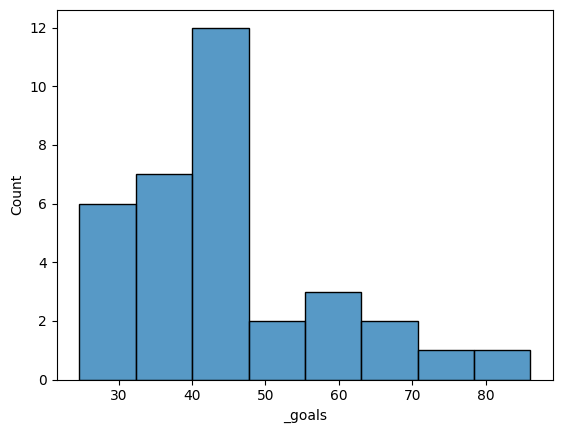

In [64]:
sns.histplot(df_group['_goals'])

<Axes: xlabel='_wins', ylabel='Count'>

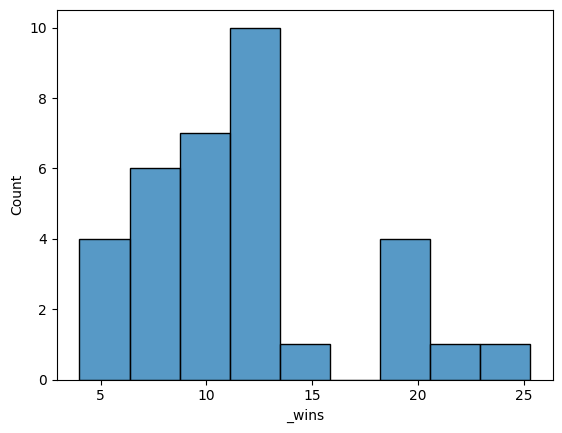

In [65]:
sns.histplot(df_group['_wins'])

<Axes: xlabel='_draws', ylabel='Count'>

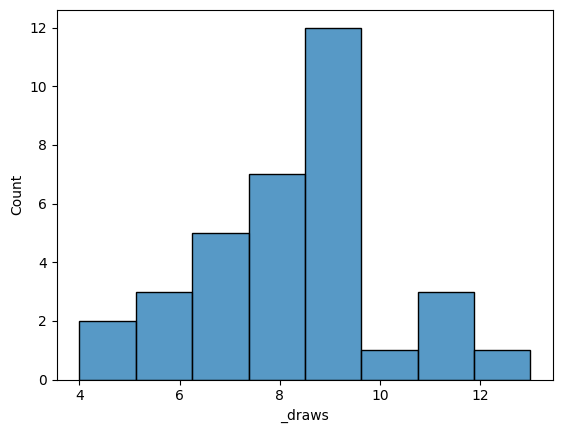

In [66]:
sns.histplot(df_group['_draws'])

In [67]:
df_new.shape

(200, 33)

In [68]:
df_new

,season,club_name,_accurate_pass,_accurate_goal_kicks,_accurate_cross,_aerial_lost,_aerial_won,_total_long_balls,_total_offside,_total_pass,_total_cross,_duel_lost,_duel_won,_saves,_wins,_draws,_won_contest,_won_corners,_won_tackle,_total_yel_card,_keeper_throws,_fwd_pass,_goals,_goals_conceded,_goals_conceded_ibox,_goals_openplay,_goal_assist,_goal_assist_intentional,_goal_assist_openplay,_goal_kicks,_good_high_claim,_blocked_cross,_blocked_pass
0,2023,Arsenal,9878.0,78.0,100.0,260.0,249.0,829.0,40.0,11335.0,397.0,950.0,944.0,29.0,12.0,4.0,151.0,158.0,182.0,30.0,108.0,3420.0,37.0,20.0,18.0,19.0,23.0,18.0,17.0,103.0,21.0,9.0,172.0
1,2022,Arsenal,17458.0,113.0,138.0,564.0,490.0,1721.0,56.0,20450.0,674.0,1840.0,1846.0,95.0,26.0,6.0,357.0,223.0,343.0,52.0,174.0,6354.0,88.0,43.0,36.0,66.0,64.0,49.0,55.0,185.0,17.0,46.0,301.0
2,2021,Arsenal,15254.0,132.0,149.0,577.0,470.0,1865.0,66.0,18290.0,633.0,1778.0,1678.0,100.0,22.0,3.0,319.0,209.0,311.0,60.0,175.0,5836.0,61.0,48.0,42.0,39.0,42.0,29.0,31.0,251.0,29.0,39.0,561.0
3,2020,Arsenal,17118.0,142.0,161.0,604.0,515.0,1850.0,61.0,20126.0,751.0,1763.0,1656.0,96.0,18.0,7.0,296.0,208.0,252.0,47.0,206.0,6007.0,55.0,39.0,35.0,42.0,39.0,31.0,35.0,238.0,23.0,42.0,566.0
4,2019,Arsenal,15582.0,221.0,141.0,599.0,513.0,1983.0,73.0,18649.0,699.0,2016.0,1934.0,147.0,14.0,14.0,411.0,232.0,336.0,86.0,233.0,5822.0,56.0,48.0,44.0,41.0,35.0,28.0,29.0,314.0,25.0,69.0,577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2022,Wolverhampton Wanderers,13590.0,161.0,156.0,543.0,468.0,2152.0,62.0,16712.0,661.0,1941.0,1890.0,119.0,11.0,8.0,375.0,186.0,370.0,84.0,196.0,5549.0,31.0,58.0,51.0,19.0,12.0,10.0,9.0,283.0,43.0,46.0,432.0
196,2021,Wolverhampton Wanderers,14236.0,200.0,137.0,494.0,465.0,2245.0,61.0,17517.0,587.0,1906.0,1919.0,125.0,15.0,6.0,450.0,168.0,377.0,59.0,220.0,5795.0,38.0,43.0,37.0,24.0,22.0,19.0,16.0,275.0,42.0,69.0,630.0
197,2020,Wolverhampton Wanderers,14570.0,196.0,171.0,608.0,581.0,2186.0,38.0,17522.0,775.0,1959.0,2015.0,103.0,12.0,9.0,468.0,209.0,335.0,53.0,156.0,5594.0,36.0,52.0,49.0,21.0,21.0,16.0,13.0,275.0,22.0,57.0,578.0
198,2019,Wolverhampton Wanderers,13286.0,171.0,177.0,719.0,788.0,2562.0,49.0,16764.0,718.0,2140.0,2289.0,91.0,15.0,14.0,509.0,193.0,367.0,57.0,127.0,5956.0,52.0,40.0,37.0,34.0,36.0,30.0,26.0,283.0,19.0,55.0,592.0


Рассмотрим совместное распределение признаков между собой 

In [69]:
df_new.iloc[:,5:8]

,_aerial_lost,_aerial_won,_total_long_balls
0,260.0,249.0,829.0
1,564.0,490.0,1721.0
2,577.0,470.0,1865.0
3,604.0,515.0,1850.0
4,599.0,513.0,1983.0
...,...,...,...
195,543.0,468.0,2152.0
196,494.0,465.0,2245.0
197,608.0,581.0,2186.0
198,719.0,788.0,2562.0


In [70]:
sns.__version__

'0.13.0'

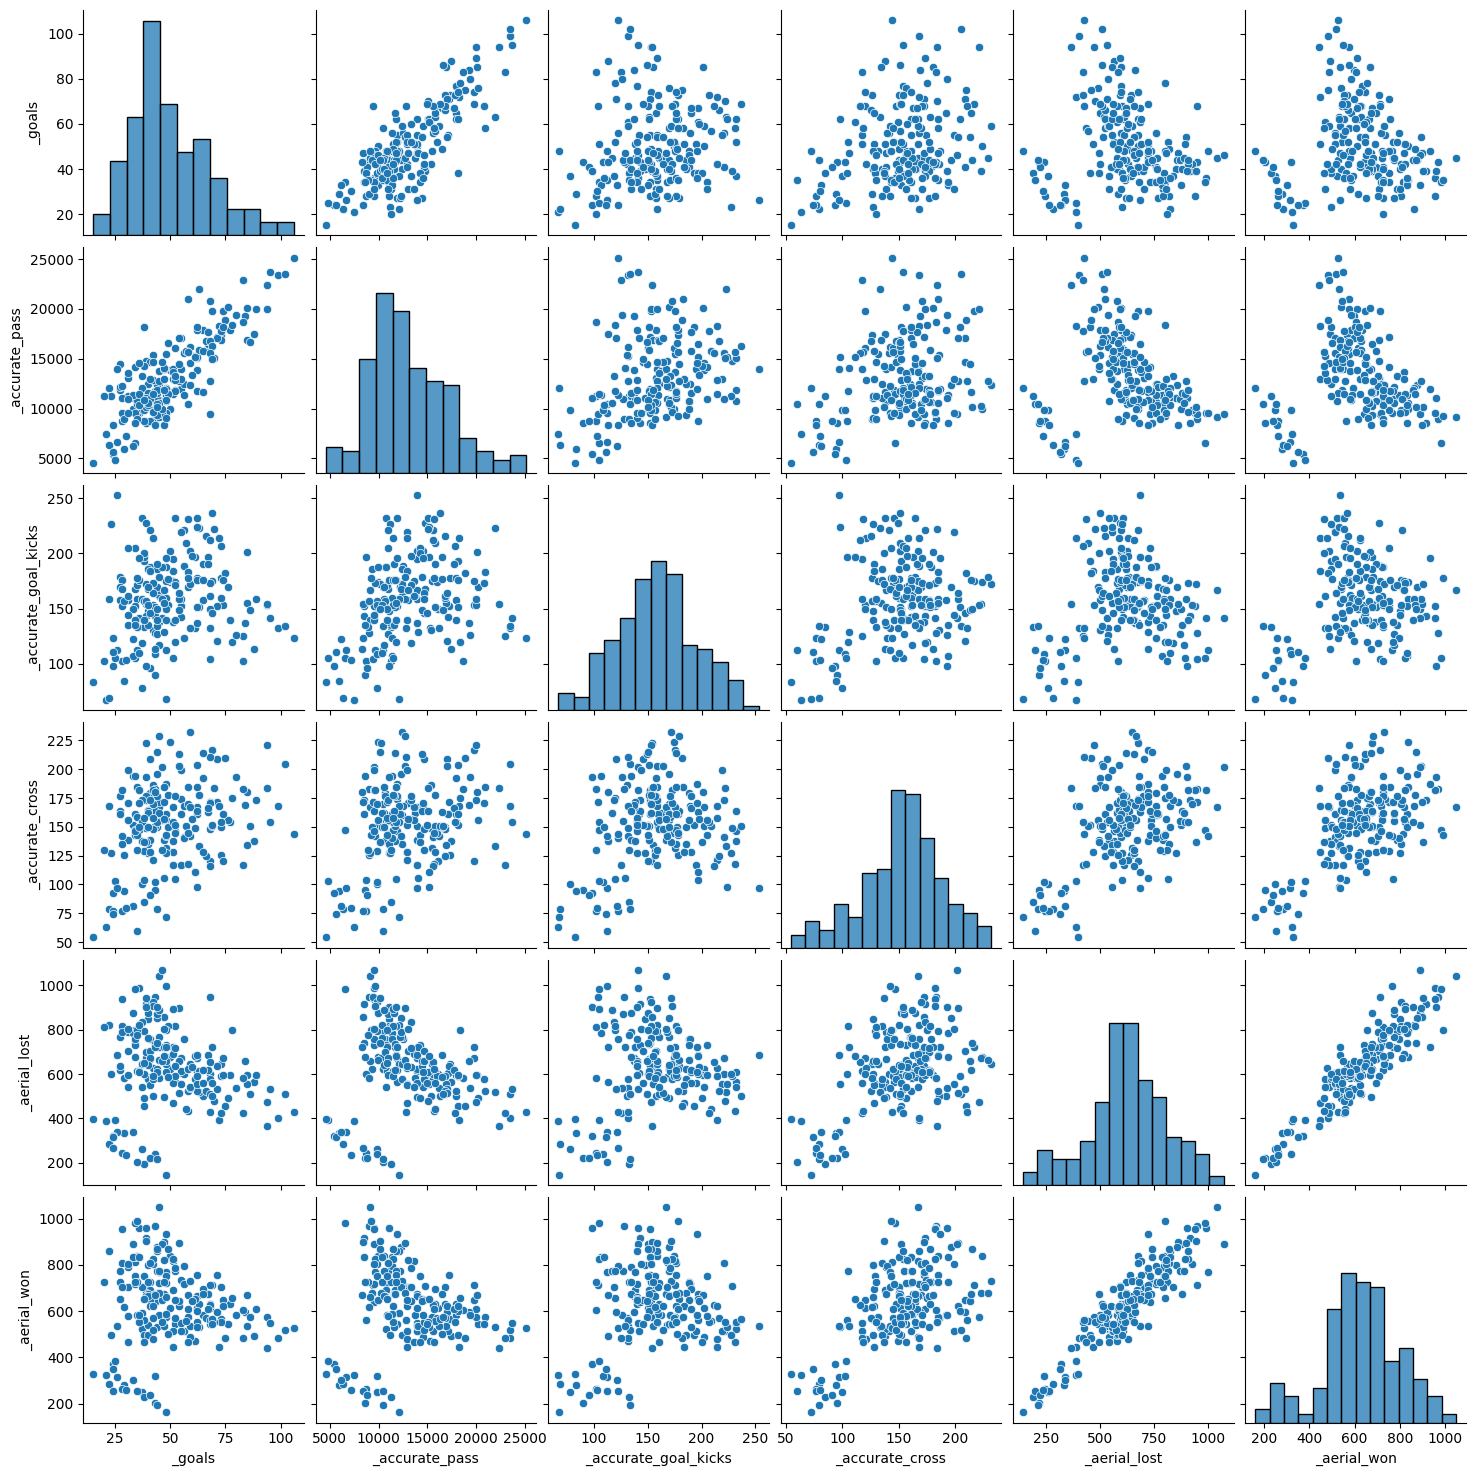

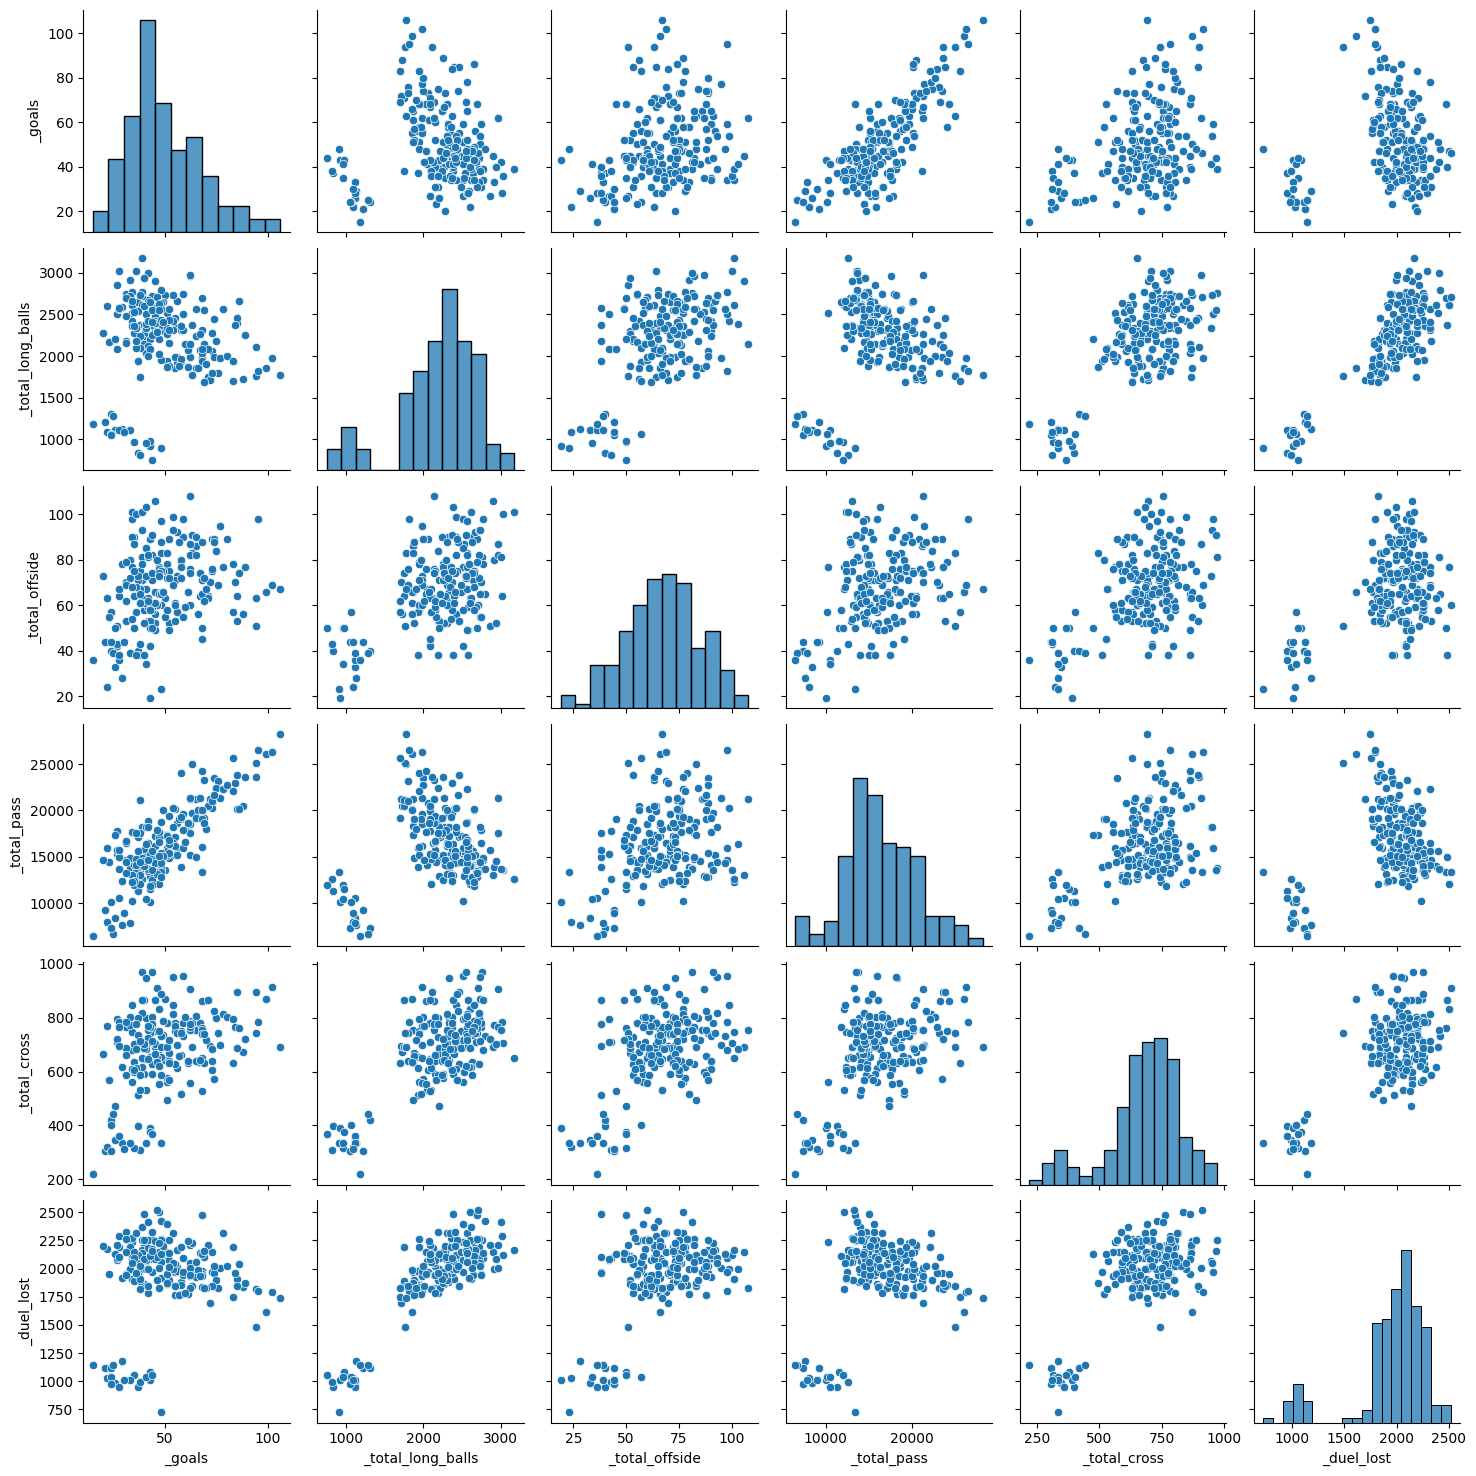

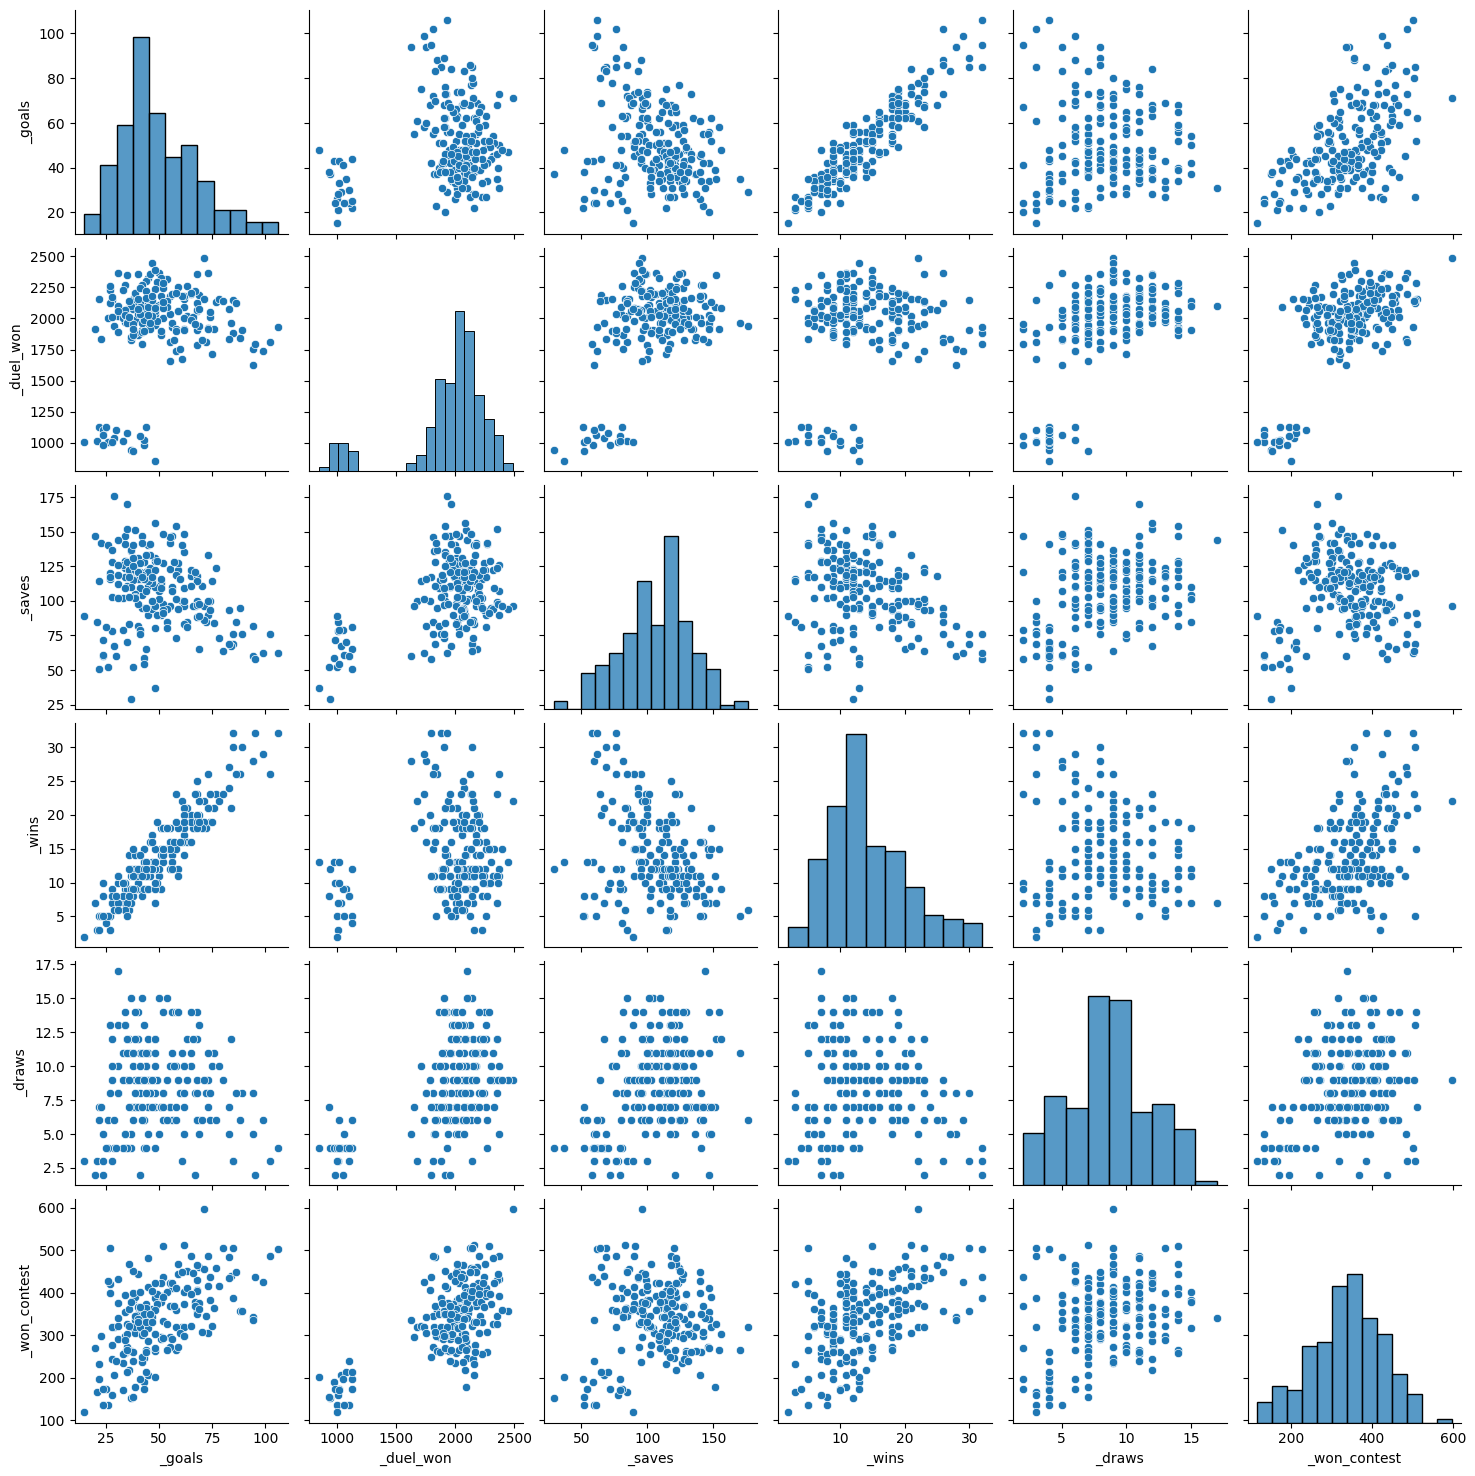

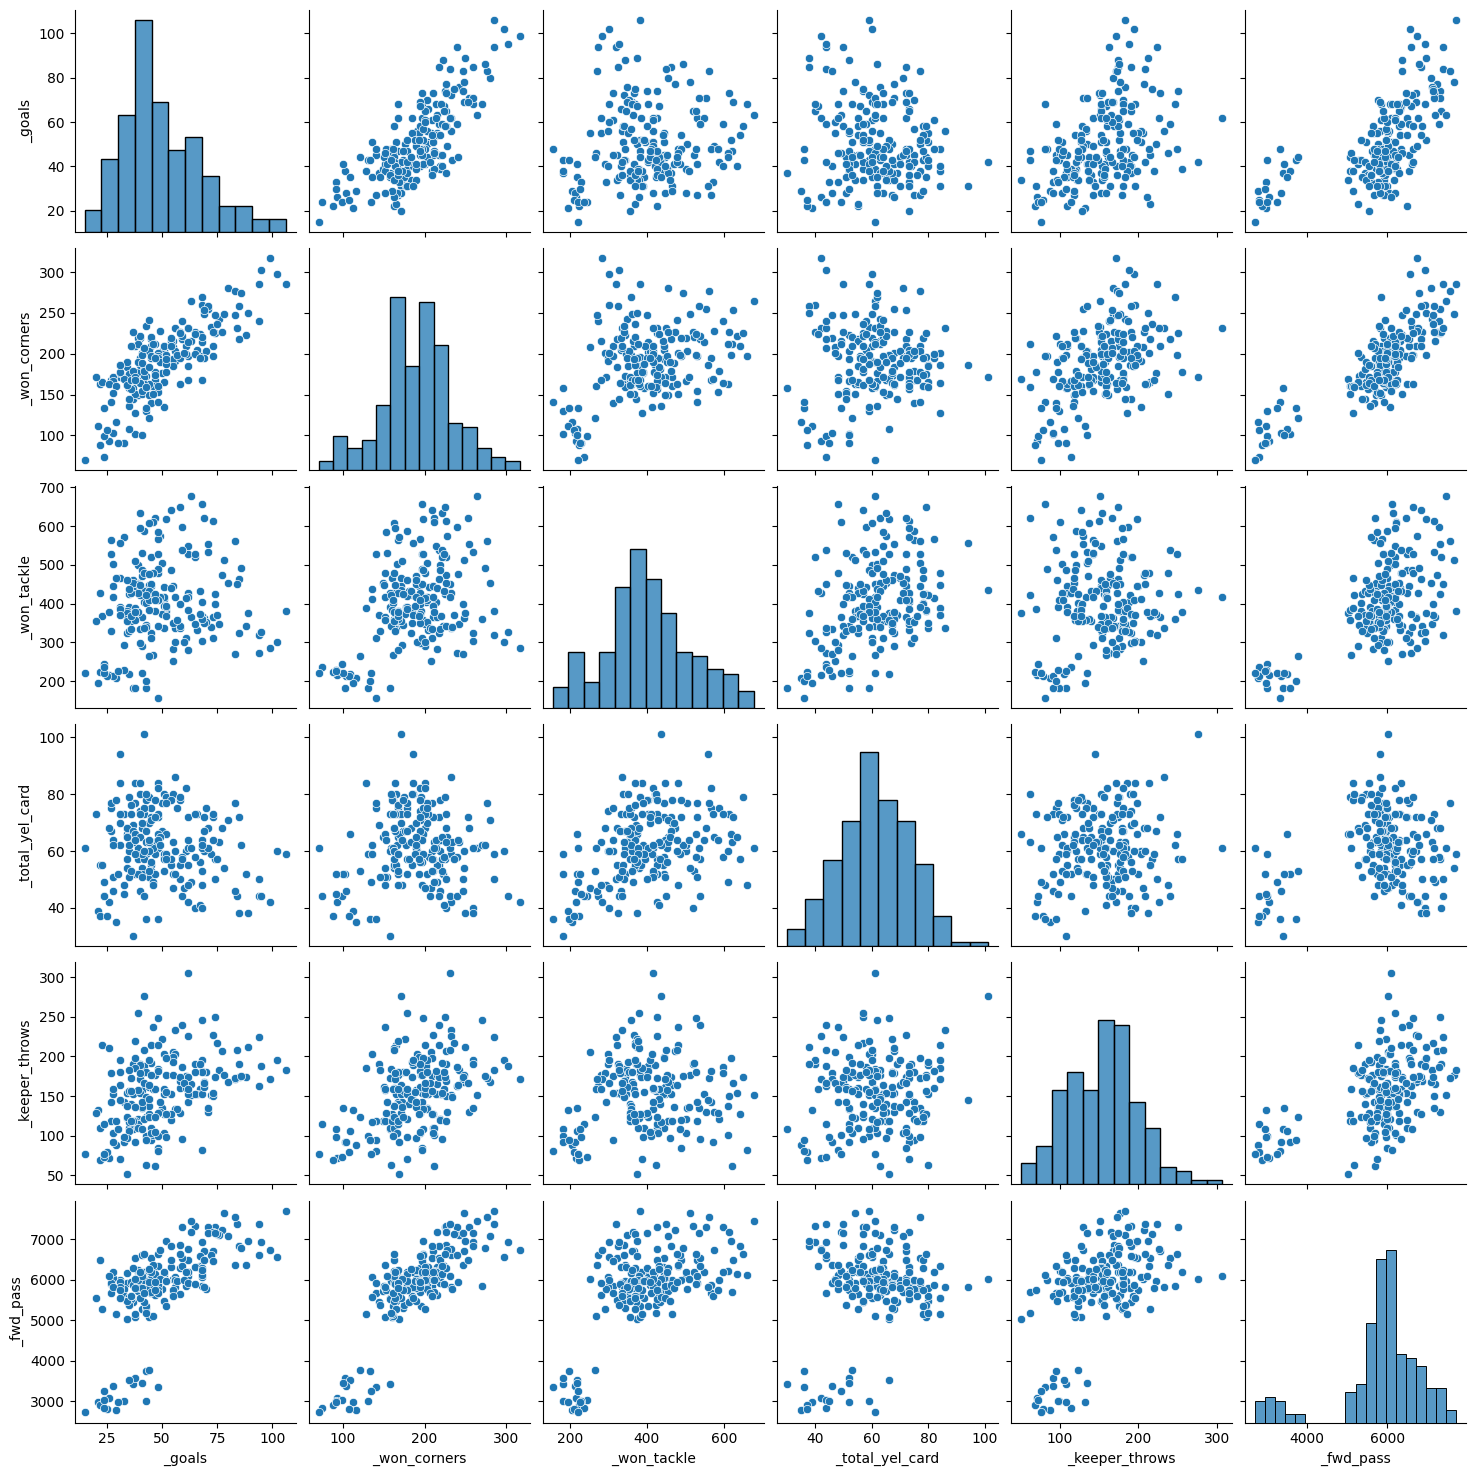

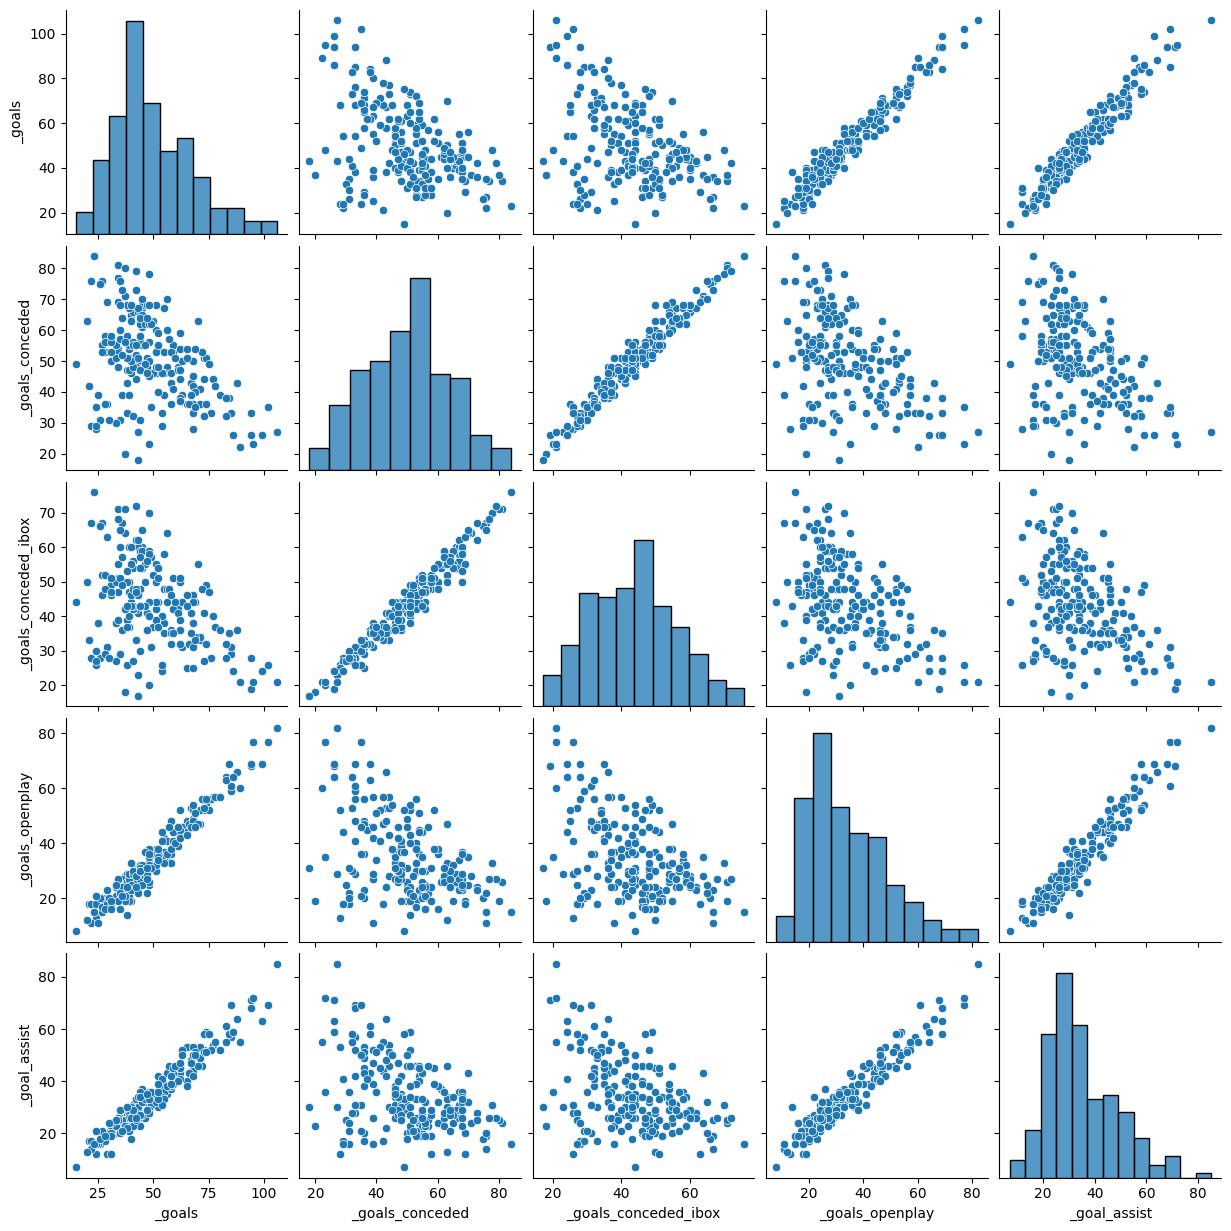

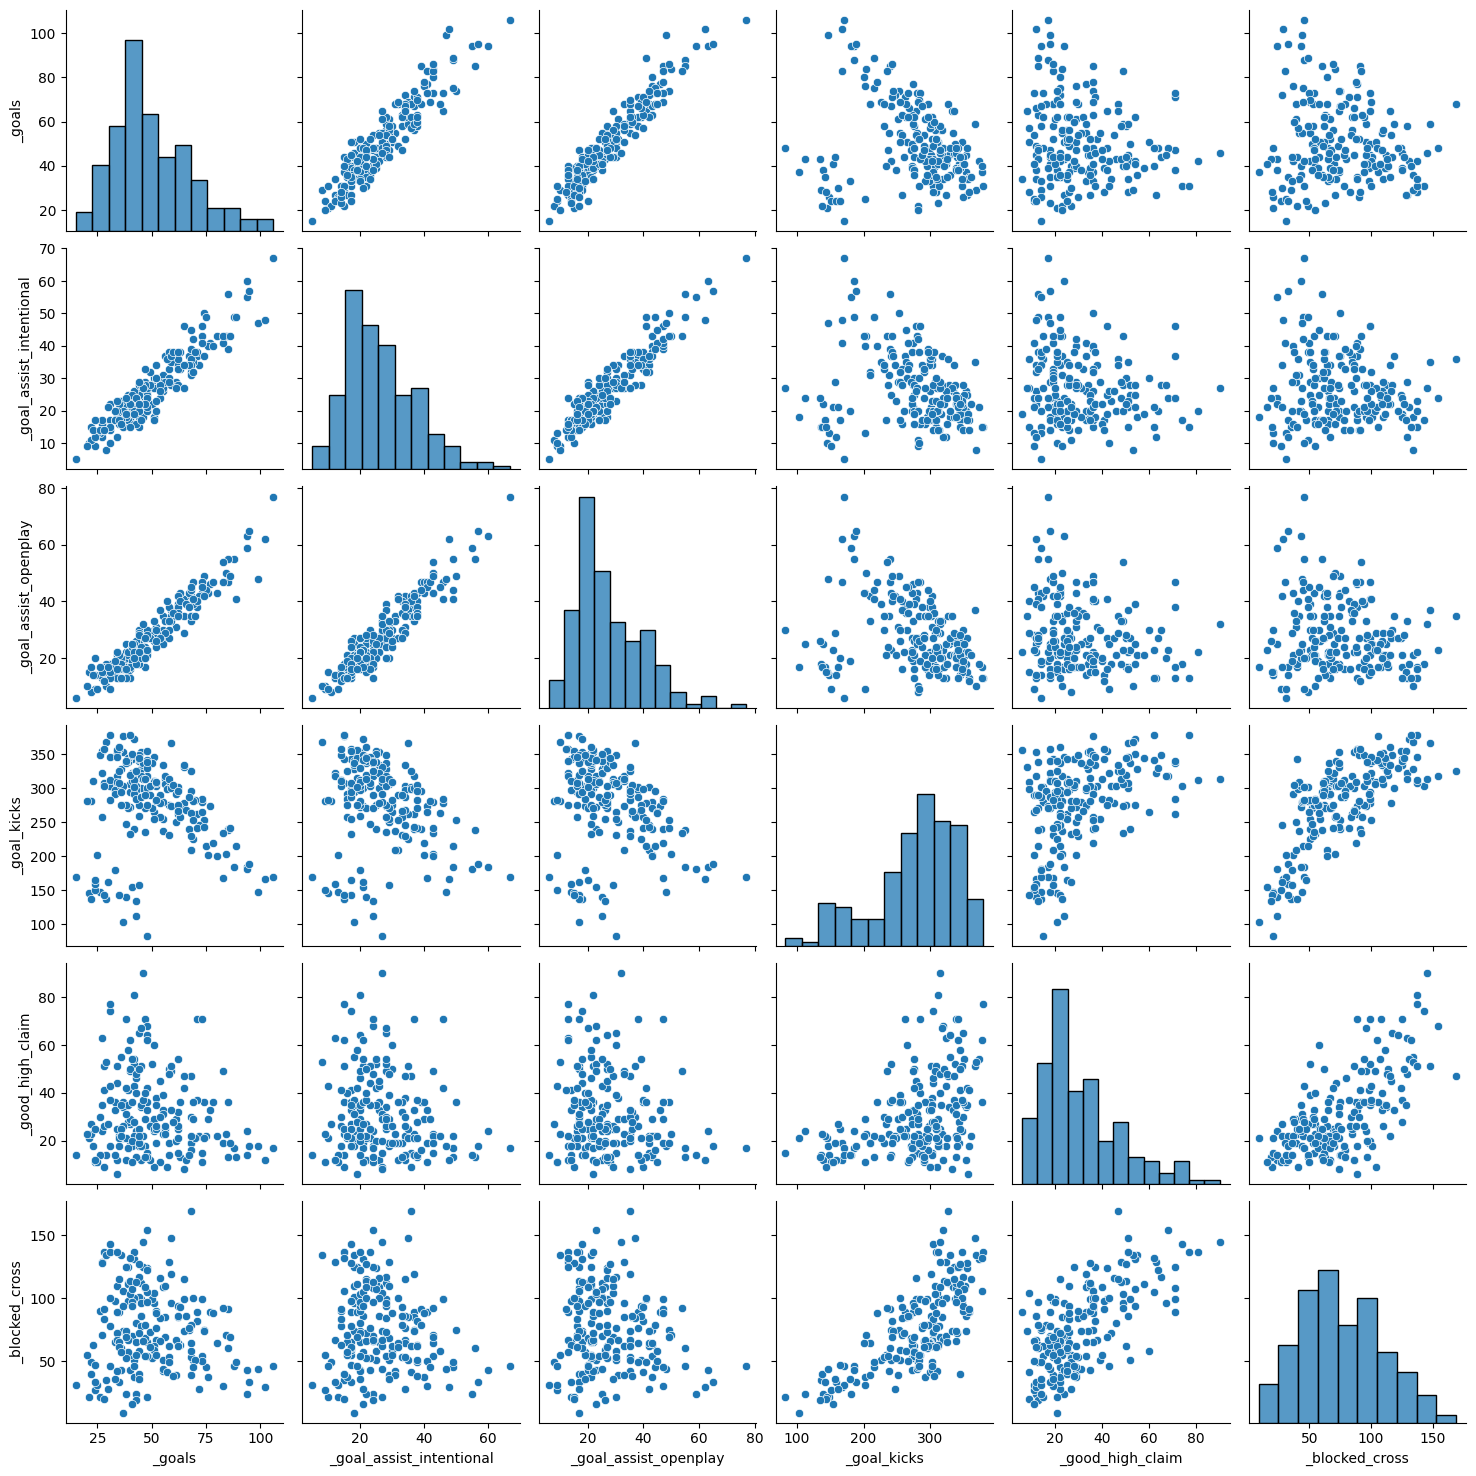

In [71]:
n = 5
target_id = 22  # _goals

for col in range(2, df_new.shape[1] - n, n):
    indices = [target_id] + list(range(col, col + n))
    
    if target_id in range(col, col + n):
        indices.remove(target_id)

    sns.pairplot(df_new.iloc[:, indices])

In [74]:
df.to_csv(Path('eda_data/clubs_stat.csv').resolve(), index=False)